In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip --no-check-certificate
!rm -rf ml-latest-small
!unzip ml-latest-small.zip
!mv /content/ml-latest-small/ratings.csv /content/
!rm -rf ml-latest-small

--2021-04-23 20:40:45--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  2.91MB/s    in 0.3s    

2021-04-23 20:40:45 (2.91 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
from collections import OrderedDict
from sklearn.model_selection import train_test_split

file1 = pd.DataFrame(pd.read_csv("ratings.csv", delimiter=','))

In [ ]:
samples, cols = file1.shape
data = np.array(file1)
user_set = set(file1["userId"])
users = len(user_set)
movie_set = set(file1["movieId"])
movies = len(movie_set)
print("total users --> ", users)
print("total movies --> ", movies)
max_user = max(user_set)
max_movie = max(movie_set)
print("Max user ID --> ", max_user)
print("Max movie ID --> ", max_movie)

total users -->  610
total movies -->  9724
Max user ID -->  610
Max movie ID -->  193609


In [ ]:
original_train, original_test = train_test_split(file1, test_size = 0.2, random_state=42)
original_train = np.array(original_train)
original_test = np.array(original_test)
# print(original_test)

N,M = original_train.shape
n_test, m_test = original_test.shape

In [ ]:
train_mtrx= []
test_mtrx = []
for j in range(max_user+1):
    x = [0]*(max_movie+1)
    y = [0]*(max_movie+1)
    train_mtrx.append(x)
    test_mtrx.append(y)

for j in range(N):
    # print("x --> ", int(original_train[j][0]))
    # print("y --> ", int(original_train[j][1]))
    train_mtrx[int(original_train[j][0])][int(original_train[j][1])] = original_train[j][2]

for j in range(len(original_test)):
    test_mtrx[int(original_test[j][0])][int(original_test[j][1])] = original_test[j][2]

In [ ]:
list_errors = []
k_values = []
u, s, v = np.linalg.svd(train_mtrx, full_matrices=False)
sm = np.diag(s)
for k in range(1, 101):
    pred_mtrx = u[:,:k] @ sm[:k, :k] @ v[:k, :]
    # print(pred_mtrx.shape)
    err = 0
    for j in range(n_test):
        x = pred_mtrx[int(original_test[j][0])][int(original_test[j][1])]
        err += (x-original_test[j][2])**2
    # print(err)
    k_values.append(k)
    list_errors.append(err)

In [ ]:
print(k_values)
print(list_errors)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[199136.91069976313, 189354.71610538123, 183489.28647625115, 179822.99000622513, 177656.27798978848, 176146.27546186367, 175832.46667154462, 175926.6390742664, 175634.6437495738, 176232.34640140747, 176953.2453316284, 177967.9991960691, 179141.9980208287, 179574.06698264307, 180408.78775339067, 180909.73977666005, 181489.4355442758, 182378.29433098578, 183065.332827639, 184337.06596981105, 184925.56603298438, 185774.14262674842, 186309.7117907096, 187010.7035462943, 187654.58296586713, 188670.1082206907, 189474.48582649065, 189922.74983824877, 190455.4232309365, 191138.55074056296, 191440.51001498286

No handles with labels found to put in legend.


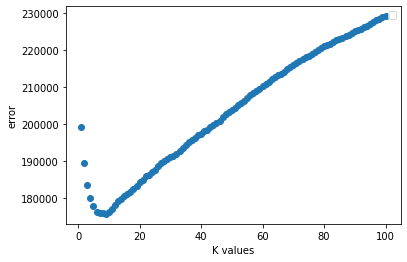

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(k_values,list_errors)
plt.xlabel("K values")
plt.ylabel("error")
plt.legend()
plt.show()

In [ ]:
user_avg = {}
for i in range(N):
    user = original_train[i][0]
    if user not in user_avg:
        avg = 0
        ct = 0
        for j in range(N):
            if original_train[j][0]==user:
                avg+=original_train[j][2]
                ct+=1
        user_avg[user] = avg/ct
print("number of users in training set --> ", len(user_avg))

number of users in training set -->  610


In [ ]:
movie_avg = {}
for i in range(N):
    mv = original_train[i][1]
    if mv not in movie_avg:
        avg = 0
        ct = 0
        for j in range(N):
            if original_train[j][1]==mv:
                avg+=original_train[j][2]
                ct+=1
        movie_avg[mv] = avg/ct
print("movies in training set --> ", len(movie_avg))

movies in training set -->  8983


In [ ]:
trainX_set = []
trainY_set = []
for i in range(N):
    temp = [user_avg[original_train[i][0]], movie_avg[original_train[i][1]]]
    trainX_set.append(temp)
    trainY_set.append(original_train[i][2])
trainX_set = np.array(trainX_set)
trainY_set = np.array(trainY_set)

In [ ]:
testX_set = []
testY_set = []
for i in range(n_test):
    if original_test[i][0] in user_avg and original_test[i][1] in movie_avg:
      temp = [user_avg[original_test[i][0]], movie_avg[original_test[i][1]]]
      testX_set.append(temp)
      testY_set.append(original_test[i][2])
    elif original_test[i][0] in user_avg:
      temp = [user_avg[original_test[i][0]], 0]
      testX_set.append(temp)
      testY_set.append(original_test[i][2])
    elif original_test[i][1] in movie_avg:
      temp = [0, movie_avg[original_test[i][1]]]
      testX_set.append(temp)
      testY_set.append(original_test[i][2])
    else:
      temp = [0,0]
      testX_set.append(temp)
      testY_set.append(original_test[i][2])
testX_set = np.array(testX_set)
testY_set = np.array(testY_set)

In [ ]:
def error_calc(y_hat, y):
    y_hat = np.array(y_hat)
    assert(y_hat.size == y.size)
    sm = 0.0
    l = len(y)
    for j in range(l):
        sm += (y_hat[j]-y[j])**2
    return sm

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
trainX_set = pd.DataFrame(trainX_set)
trainY_set = pd.Series(trainY_set)
LR.fit(trainX_set, trainY_set)
y_hat = LR.predict(testX_set)
error = error_calc(y_hat, testY_set)
print(error)

22751.16882044244


So the average error in the baseline algorithm is 22751.1688 whereas the minimum error low rank approximation was 176000